In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = 'C:/Users/pipi7/Downloads/data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\pipi7\AppData\Local\Temp\ipykernel_10932\475320997.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

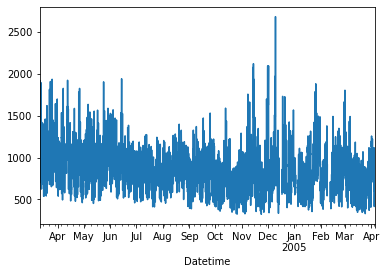

In [2]:
df['PT08.S3(NOx)'].plot()

In [3]:
nox = df['PT08.S3(NOx)'].copy()
nox.interpolate(inplace=True)

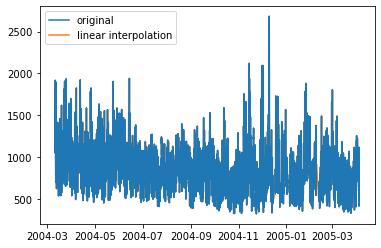

In [4]:
plt.plot(df['PT08.S3(NOx)'], label='original', zorder=2)
plt.plot(nox, label='linear interpolation', zorder=1)
plt.legend(loc='best')

{'whiskers': [<matplotlib.lines.Line2D at 0x24b052f8610>,
 'caps': [<matplotlib.lines.Line2D at 0x24b052f8bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b052f8310>],
 'medians': [<matplotlib.lines.Line2D at 0x24b05306190>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b05306460>],
 'means': []}

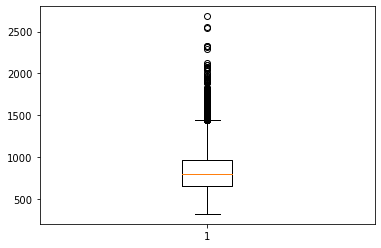

In [5]:
plt.boxplot(nox)

In [7]:
corr_matrix = df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [8]:
q1 = nox.quantile(0.25)
median = nox.quantile(0.5)
q3 = nox.quantile(0.75)
print(q1,median,q3)

iqr = q3 - q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(iqr, upper_fence, lower_fence)

654.0 804.0 968.0
314.0 1439.0 183.0


Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64


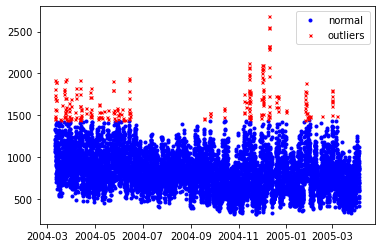

In [9]:
outliers = nox.loc[(nox > upper_fence) | (nox < lower_fence)]
print(outliers)

mask = nox.index.isin(outliers.index)
nox[~mask]

plt.plot(nox[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

<AxesSubplot:xlabel='Datetime'>

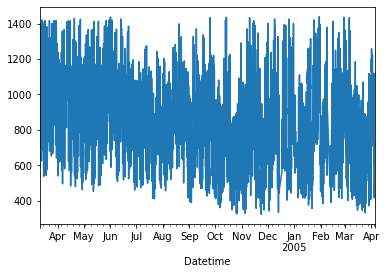

In [10]:
nox_refined = nox.copy()
nox_refined[mask] = np.nan
nox_refined.interpolate(inplace=True)
nox_refined.plot()

C:\Users\pipi7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


832.7588970823982 255.69616900657363


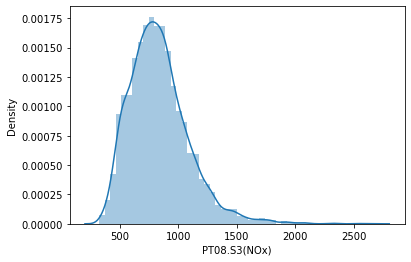

In [11]:
import seaborn as sns

sns.distplot(nox)

mean = np.mean(nox)
std = np.std(nox)
print(mean, std)

In [12]:
outliers = []
thres = 3

for i in nox:
    z_score = (i - mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562
